# This notebook demonstrates how to access geographical data

In [1]:
%matplotlib inline
from disaggregator import config, data

### Show underlying nuts3 data

... short, in form of a dictionary:

In [18]:
dic_nuts3 = config.region_id_to_nuts3(raw = True)
dic_nuts3.loc[dic_nuts3.name.str.contains('ecklen')]
#dic_nuts3.loc[dic_nuts3.ags_lk.str.contains(13)]
#dic_nuts3.loc[dic_nuts3.ags_lk == 13074]

,ags_lk,id_ags,id_ags_lk,id_nuts3,id_t_nuts3_lk,name,natcode_nuts3
idx,,,,,,,
347,13071,13071000,416,27600416,397,Mecklenburgische Seenplatte,DE80J
350,13074,13074000,419,27600419,400,Nordwestmecklenburg,DE80M


... long, in form of a `pd.DataFrame`:

In [8]:
df_nuts3 = config.region_id_to_nuts3(raw=True)
df_nuts3.head(n=10)

,ags_lk,id_ags,id_ags_lk,id_nuts3,id_t_nuts3_lk,name,natcode_nuts3
idx,,,,,,,
0,1001,1001000,1,27600001,1,"Flensburg, Kreisfreie Stadt",DEF01
1,1002,1002000,2,27600002,2,"Kiel, Kreisfreie Stadt",DEF02
2,1003,1003000,3,27600003,3,"Lübeck, Kreisfreie Stadt",DEF03
3,1004,1004000,4,27600004,4,"Neumünster, Kreisfreie Stadt",DEF04
4,1051,1051000,5,27600005,5,Dithmarschen,DEF05
5,1053,1053000,6,27600006,6,Herzogtum Lauenburg,DEF06
6,1054,1054000,7,27600007,7,Nordfriesland,DEF07
7,1055,1055000,8,27600008,8,Ostholstein,DEF08
8,1056,1056000,9,27600009,9,Pinneberg,DEF09


### Show underlying geodata

The above shown data can be connected to polygon shapes which are available from the Rest-API. All that is done automatically within `data.database_shapes()`

In [12]:
gdf = data.database_shapes()
gdf.head()

,ags,gen,id_ags,geometry
nuts3,,,,
DE111,8111,Stuttgart,8111000,"(POLYGON ((503296.317085977 5399263.24042964, ..."
DE112,8115,Böblingen,8115000,"(POLYGON ((488997.255248972 5376020.94077613, ..."
DE113,8116,Esslingen,8116000,"(POLYGON ((522281.668950966 5380559.67301634, ..."
DE114,8117,Göppingen,8117000,"(POLYGON ((553258.055977065 5378012.31748046, ..."
DE115,8118,Ludwigsburg,8118000,"(POLYGON ((529197.2800831629 5432422.24820909,..."


... and can easily be plotted:

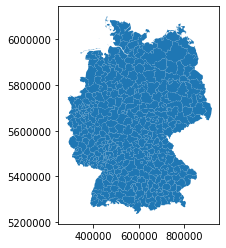

In [13]:
gdf.plot()